### FFNN Economic Choice No Hold

Hopefully it works

In [1]:
# --- Imports ---
import os
import sys
import random
import pickle
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_economic_choice_no_hold import EconomicChoiceEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_firing_rates, plot_psychometric_curve, load_model, save_model

# --- Set Random Seeds ---
seed_value = 1
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-06-05 19:00:02.809176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749142804.160832  223615 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749142804.614815  223615 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749142808.088435  223615 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749142808.088465  223615 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749142808.088467  223615 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código 2/Modules' to sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.0
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [10, 10, 20, 20]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 5000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 5000 episodes...


2025-06-05 15:25:15.701834: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Episode 100	Total Reward: -0.09	State [1.  1.  0.3 0.1]	Actor Loss: -0.1991	Critic Loss: 0.0277
Episode 200	Total Reward: -0.09	State [ 0.  -1.   0.1  0.3]	Actor Loss: -0.0755	Critic Loss: 0.0552
Episode 300	Total Reward: 1.03	State [ 0.  -1.   0.1  0.1]	Actor Loss: -0.1444	Critic Loss: 2.4743
Episode 400	Total Reward: 2.02	State [ 0.  -1.   0.1  0.2]	Actor Loss: -0.0599	Critic Loss: 0.6033
Episode 500	Total Reward: 10.01	State [ 0.  -1.   0.1  1. ]	Actor Loss: 6.2146	Critic Loss: 56.1810
Episode 600	Total Reward: 2.22	State [ 0.  -1.   0.1  0. ]	Actor Loss: 0.1617	Critic Loss: 0.0534
Episode 700	Total Reward: 2.22	State [0.  1.  0.  0.1]	Actor Loss: -0.0288	Critic Loss: 0.0290
Episode 800	Total Reward: 1.02	State [ 0.  -1.   0.2  0.1]	Actor Loss: -0.4386	Critic Loss: 1.2736
Episode 900	Total Reward: 2.02	State [ 0.  -1.   0.1  0.2]	Actor Loss: -0.0475	Critic Loss: 0.1562
Episode 1000	Total Reward: 2.23	State [0.  1.  0.2 0.1]	Actor Loss: -0.0130	Critic Loss: 0.1138
Episode 1100	Total 

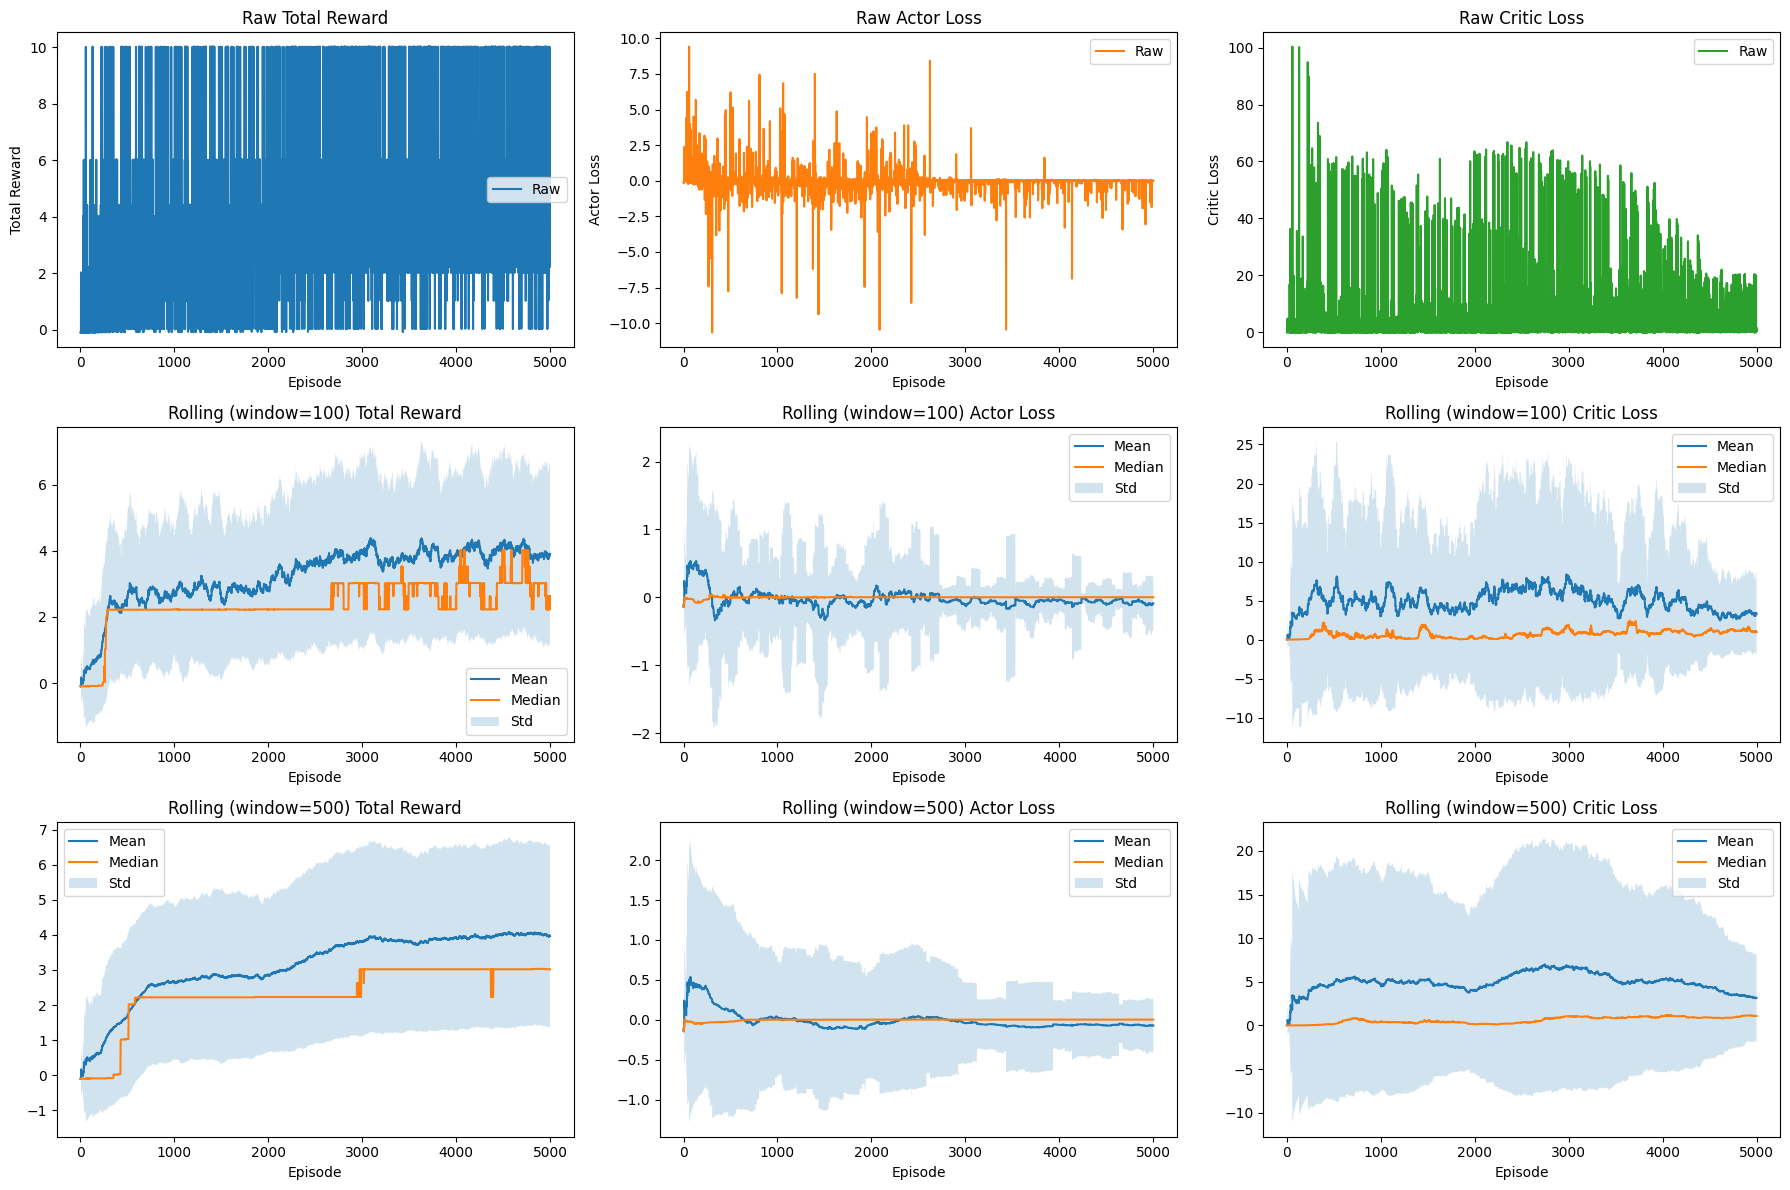

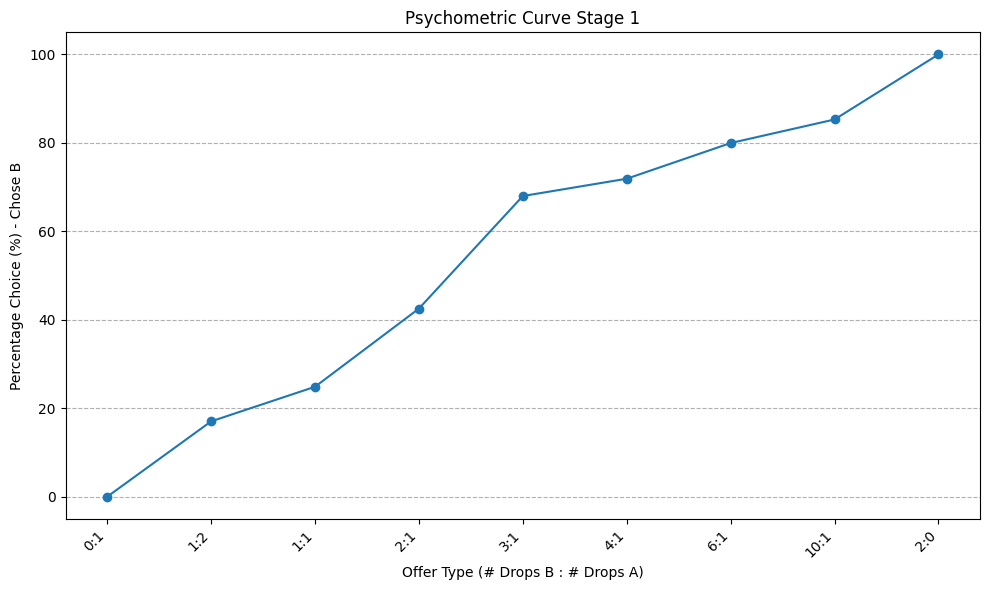

Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.0,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [10, 10, 20, 20],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 5000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, \
    actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Save checkpoint ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "2_ffnn_nohold_max.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Training Metrics & Psychometric Curve ---
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )
    plot_psychometric_curve(
        measurements_juices,
        title="Psychometric Curve Stage 1"
    )

    # --- Close Environment ---
    print("Closing the environment...")
    env.close()
    print("Environment closed.")

if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [30, 20, 40, 40]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 2000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_1/ckpt-1
Checkpoint restored successfully.
Starting training for 2000 episodes...
Episode 100	Total Reward: 3.05	State [ 0.         -1.          0.02561904  0.37154788]	Actor Loss: 0.0033	Critic Loss: 0.4830
Episode 200	Total Reward: 3.06	State [0.         1.         0.3209473  0.12704386]	Actor Loss: 0.0152	Critic Loss: 0.3882
Episode 300	Total Reward: 3.06	State [ 0.         -1.          0.          0.25502828]	Actor Loss: 0.0069	Critic Loss: 0.6585
Episode 400	Total Reward: 4.07	State [0.         1.         0.33367488 0.02580401]	Actor Loss: 0.0098	Critic Loss: 2.1683
Episode 500	Total Reward: 2.25	State [ 0.         -1.          0.05781998  0.07539723]	Actor Loss: 0.0019	Critic Loss: 1.4073
Episode 600	Total Reward: 4.47	State [ 0.         -1.          0.21818419  0.21894892]	Actor Loss: 0.0473	Critic Loss: 0.7891
Episode 700	Total Reward: 4.47	State [ 0.         -1.          0.10512176  0.20810497]	Ac

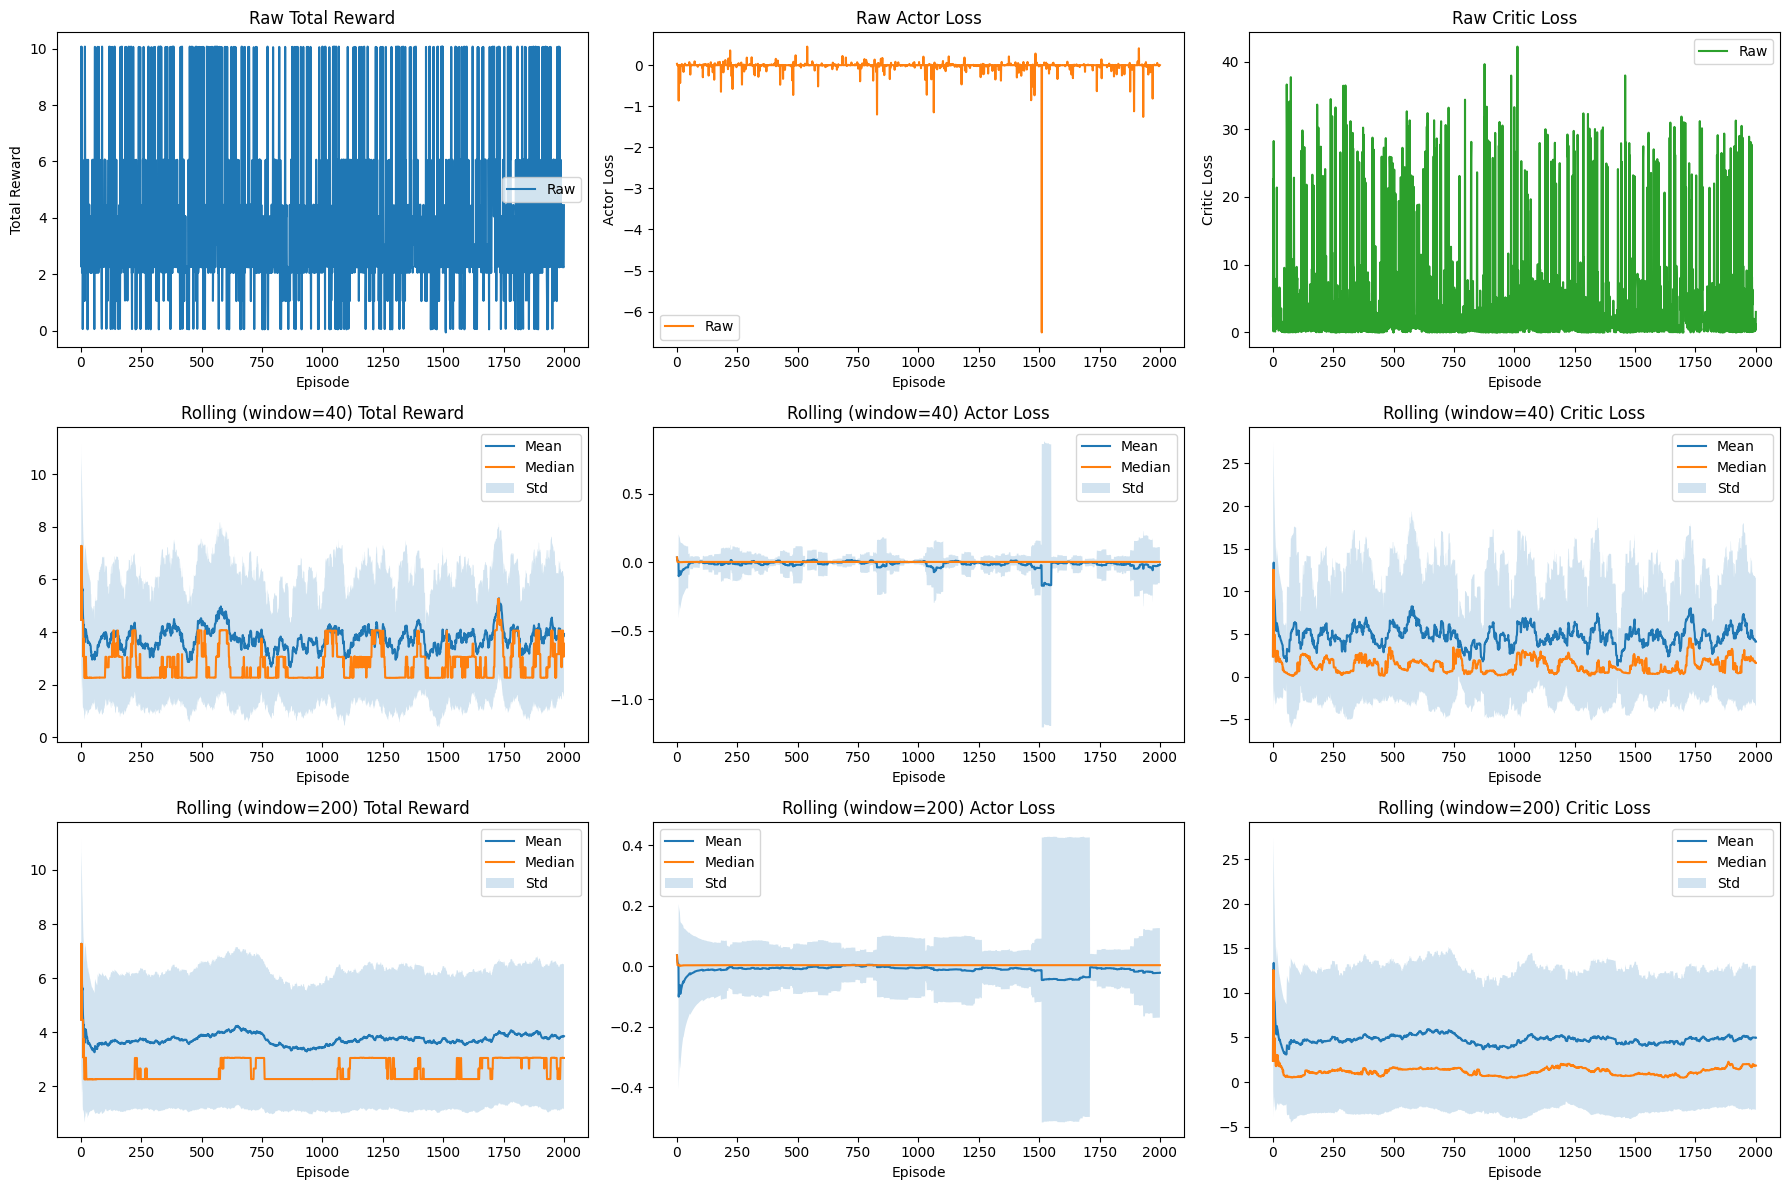

Plotting psychometric curve...


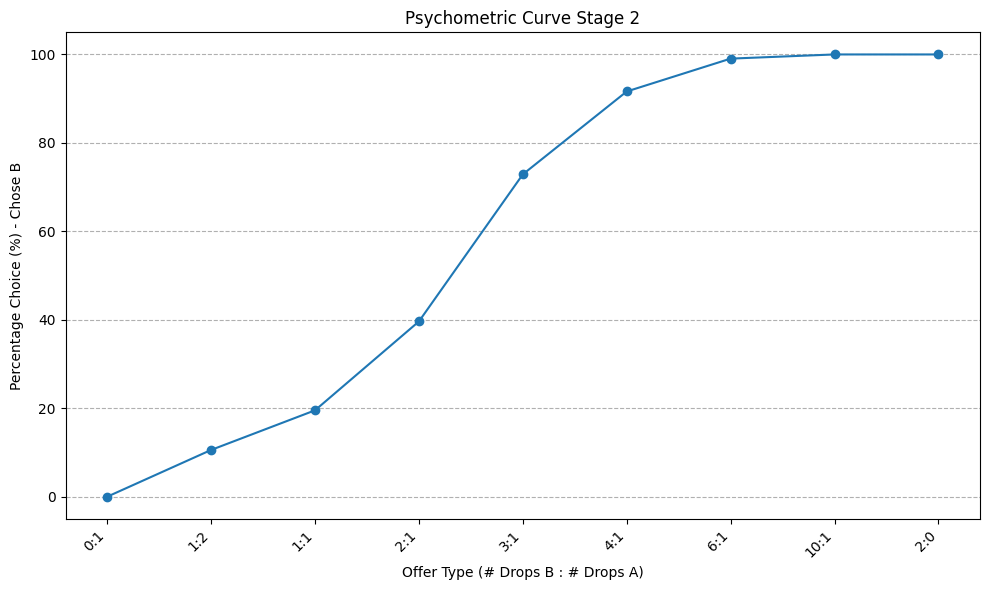

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [30, 20, 40, 40],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 2000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_2.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [60, 40, 80, 80]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 2000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_2/ckpt-1
Checkpoint restored successfully.
Starting training for 2000 episodes..

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Episode 100	Total Reward: 3.13	State [0.         1.         0.25616476 0.01489261]	Actor Loss: 0.0039	Critic Loss: 0.1710
Episode 200	Total Reward: 2.32	State [ 0.         -1.          0.15566969  0.13699485]	Actor Loss: 0.0036	Critic Loss: 0.0051
Episode 300	Total Reward: 2.30	State [0.        1.        0.0857772 0.1628275]	Actor Loss: 0.0031	Critic Loss: 0.1015
Episode 400	Total Reward: 2.12	State [ 0.         -1.          0.          0.18336084]	Actor Loss: 0.0032	Critic Loss: 0.3204
Episode 500	Total Reward: 2.30	State [0.         1.         0.28684762 0.21907741]	Actor Loss: -0.0017	Critic Loss: 0.5585
Episode 600	Total Reward: 10.12	State [0.         1.         1.0862834  0.00146149]	Actor Loss: 0.0033	Critic Loss: 26.8556
Episode 700	Total Reward: 2.11	State [ 0.         -1.          0.07460966  0.2474624 ]	Actor Loss: 0.0004	Critic Loss: 1.7056
Episode 800	Total Reward: 4.52	State [0.         1.         0.11201451 0.17357193]	Actor Loss: 0.0040	Critic Loss: 3.9497
Episode 900	T

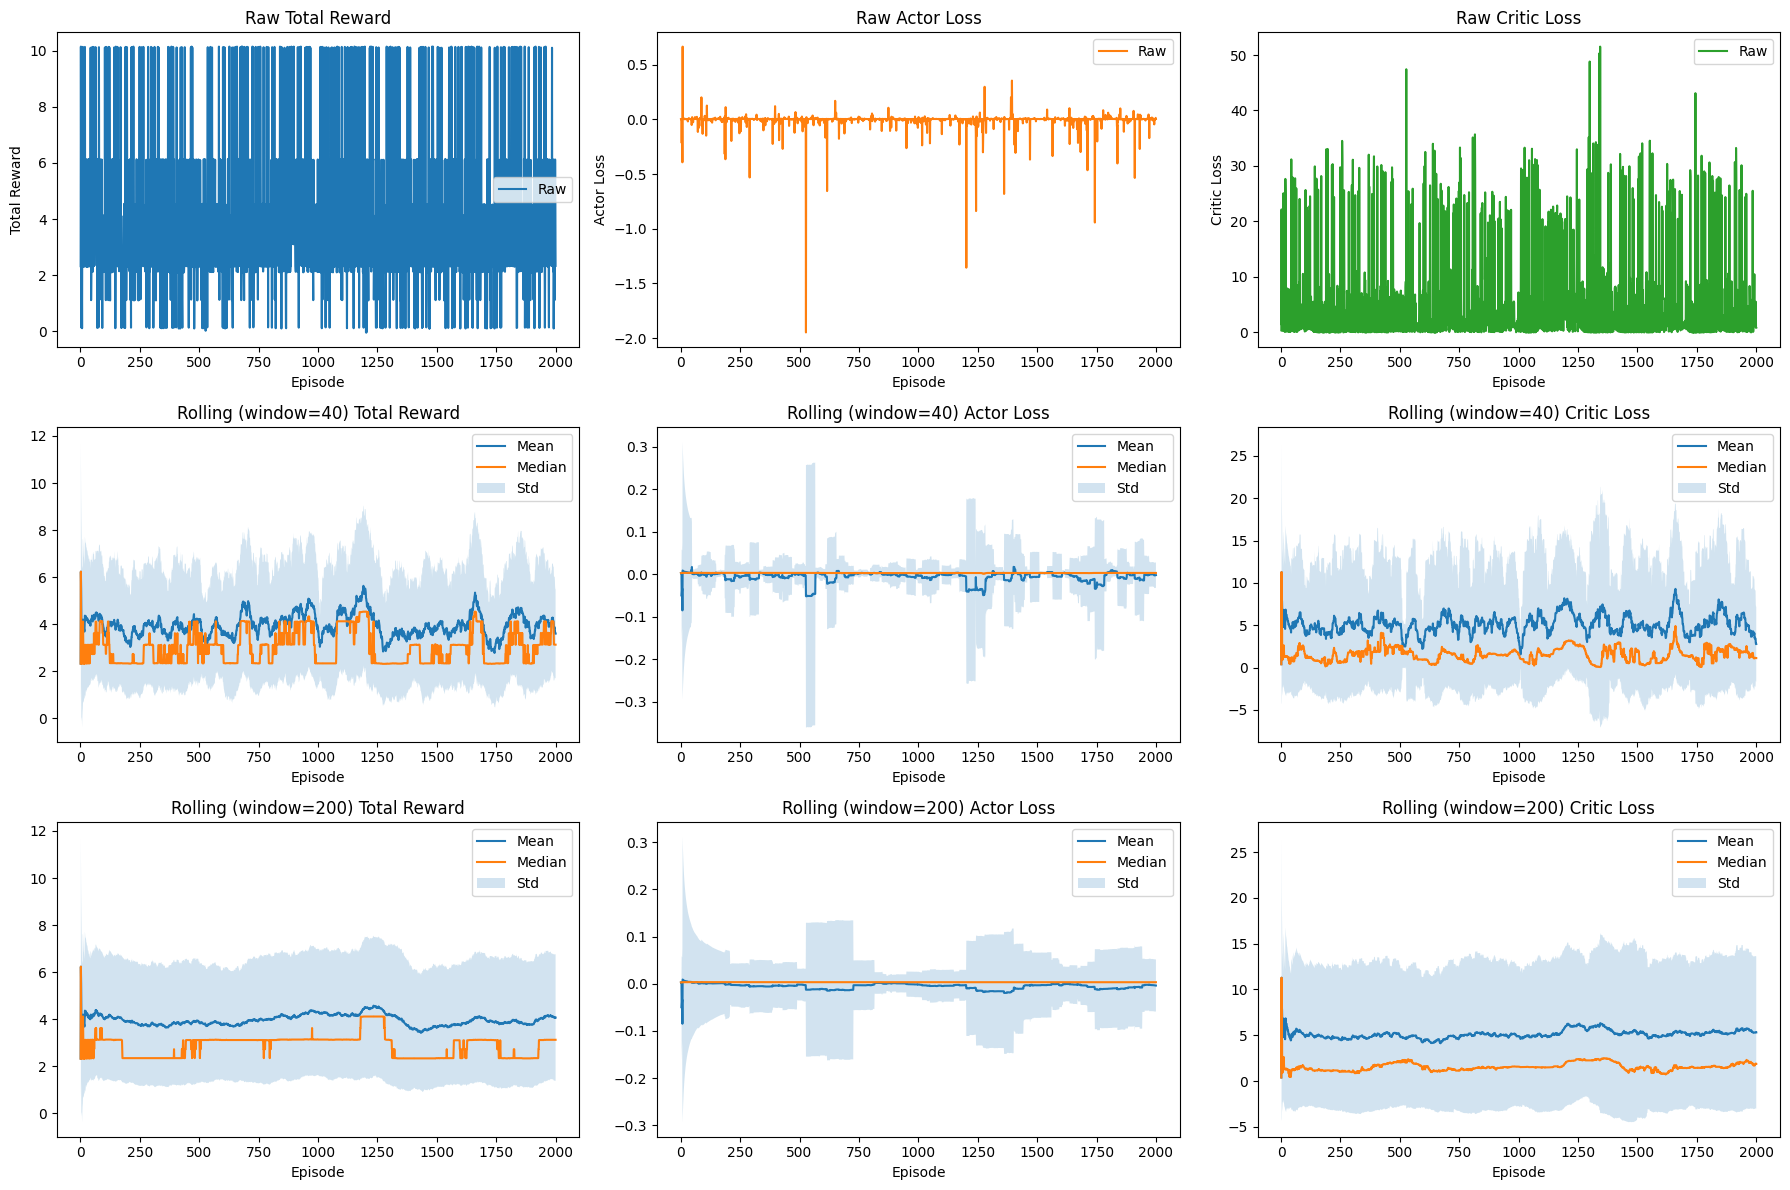

Plotting psychometric curve...


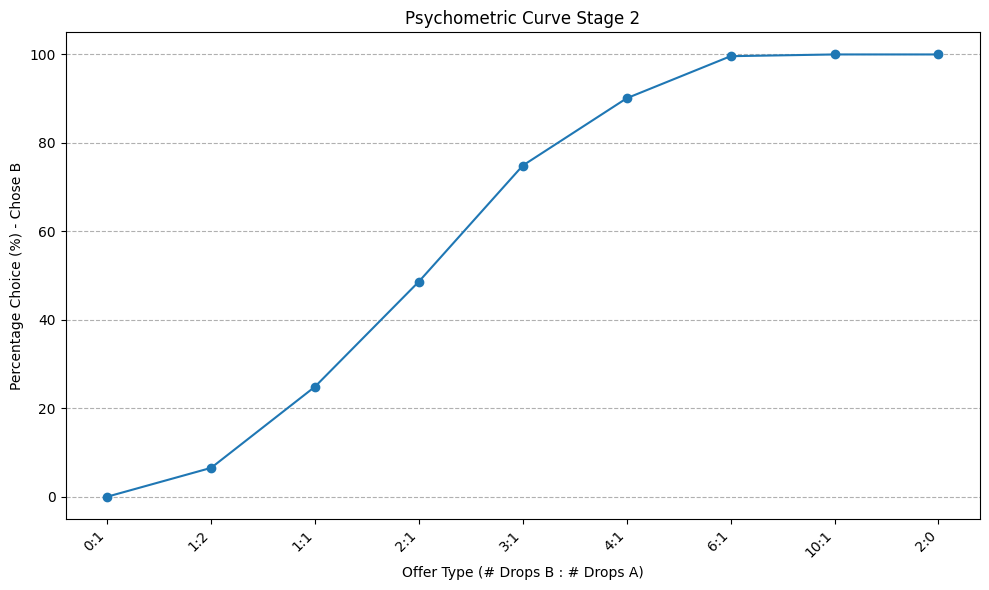

Closing environment...
Done.


In [4]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [60, 40, 80, 80],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 2000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_3.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 2")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.01
  reward_go_fixation: -0.01
  duration_params: [120, 80, 160, 160]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 1000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 3...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_3/ckpt-1
Checkpoint restored successfully.
Starting training for 1000 episodes...
Episode 100	Total Reward: 2.26	State [0.         1.         0.27822432 0.08036896]	Actor Loss: -0.0005	Critic Loss: 0.9676
Episode 200	Total Reward: 6.26	State [ 0.         -1.          0.03808795  0.7150825 ]	Actor Loss: 0.0032	Critic Loss: 8.0415
Episode 300	Total Reward: 10.28	State [0.         1.         1.1        0.07358761]	Actor Loss: 0.0032	Critic Loss: 26.0483
Episode 400	Total Reward: 2.46	State [0.         1.         0.10315873 0.17111626]	Actor Loss: 0.0032	Critic Loss: 0.0271
Episode 500	Total Reward: 2.21	State [ 0.         -1.          0.00866954  0.19149563]	Actor Loss: 0.0032	Critic Loss: 0.2863
Episode 600	Total Reward: 4.26	State [0.         1.         0.17641099 0.        ]	Actor Loss: 0.0455	Critic Loss: 2.4354
Episode 700	Total Reward: 10.25	State [0.        1.        0.8006279 0.1905563]	Actor Loss: 0.0031	Critic Loss: 28.639

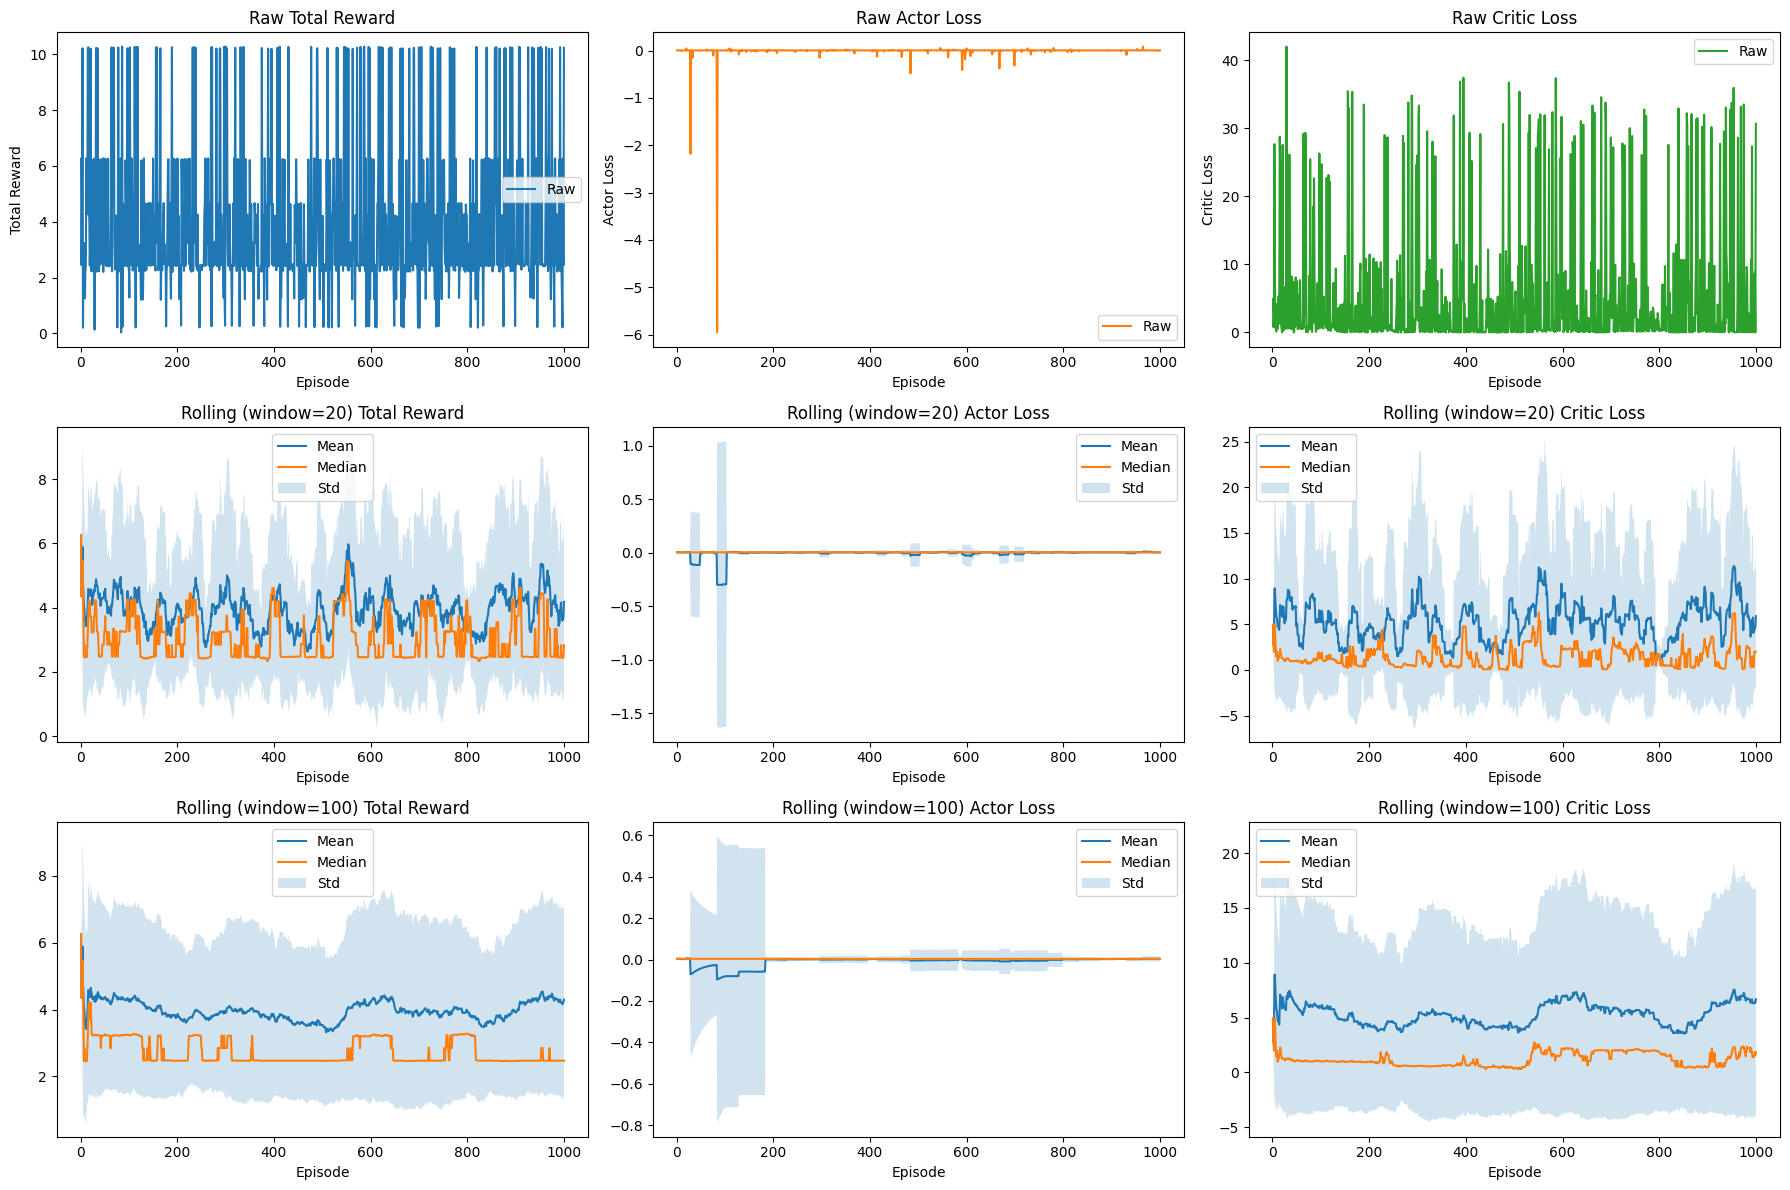

Plotting psychometric curve...


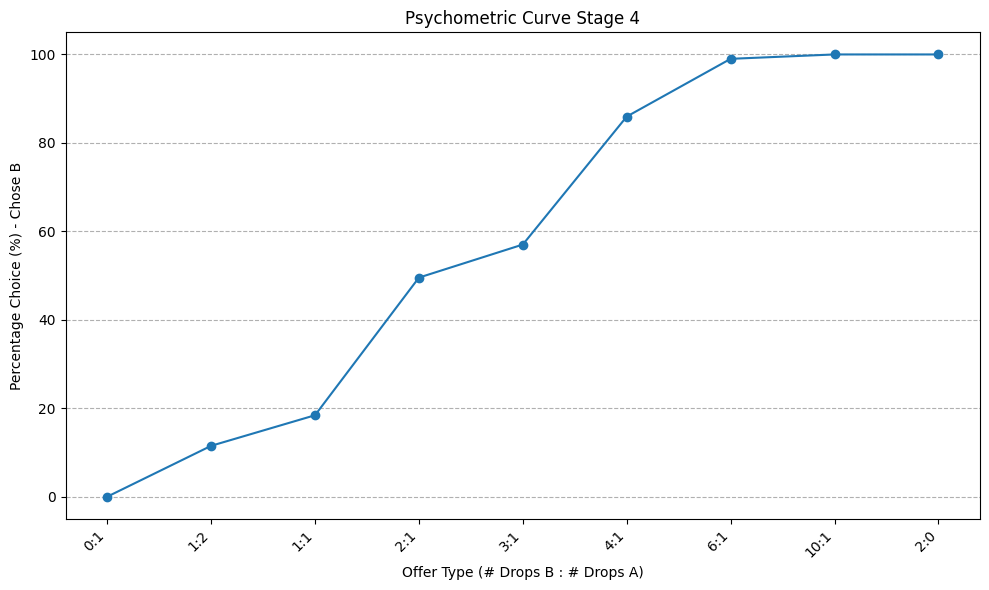

Closing environment...
Done.


In [5]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.01,
        "reward_go_fixation": -0.01,
        "duration_params": [120, 80, 160, 160],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 1000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 4 finished.")

    # --- Save checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_4.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 4")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.001
  reward_go_fixation: -0.01
  duration_params: [240, 160, 320, 320]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.003
  critic_lr: 0.003
  num_episodes: 1000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


2025-06-05 16:07:38.788743: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_4/ckpt-1
Checkpoint restored successfully.
Starting training for 1000 episodes...
Episode 100	Total Reward: 3.05	State [0.         1.         0.25017777 0.04303119]	Actor Loss: 0.0041	Critic Loss: 0.0796
Episode 200	Total Reward: 3.05	State [ 0.         -1.          0.05398238  0.40012336]	Actor Loss: 0.0031	Critic Loss: 0.0213
Episode 300	Total Reward: 1.05	State [ 0.         -1.          0.01426082  0.15001805]	Actor Loss: -0.0045	Critic Loss: 3.4935
Episode 400	Total Reward: 2.26	State [ 0.         -1.          0.12843001  0.16758598]	Actor Loss: 0.0029	Critic Loss: 0.0242
Episode 500	Total Reward: 10.06	State [ 0.         -1.          0.06647221  1.0980405 ]	Actor Loss: 0.0031	Critic Loss: 21.2877
Episode 600	Total Reward: 2.25	State [ 0.         -1.          0.20096444  0.20540261]	Actor Loss: 0.0030	Critic Loss: 0.

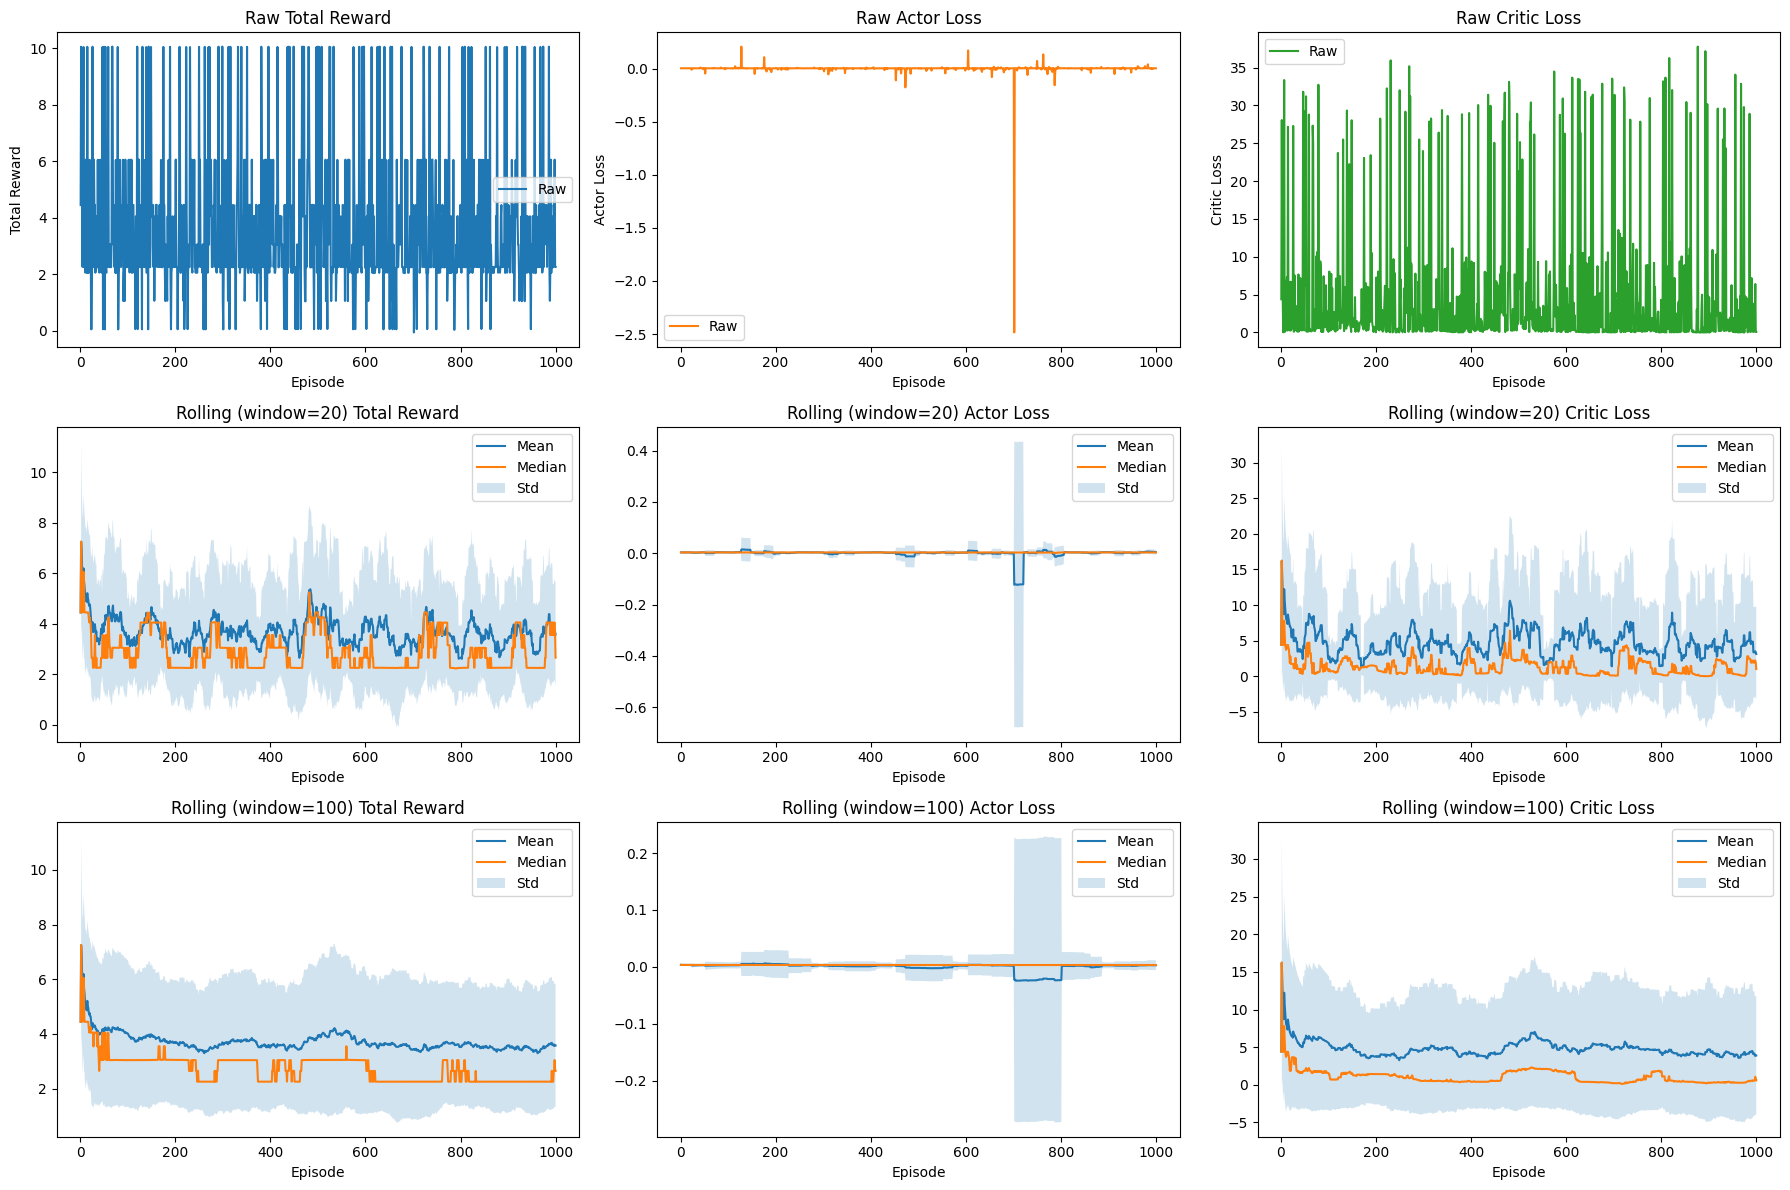

Plotting psychometric curve...


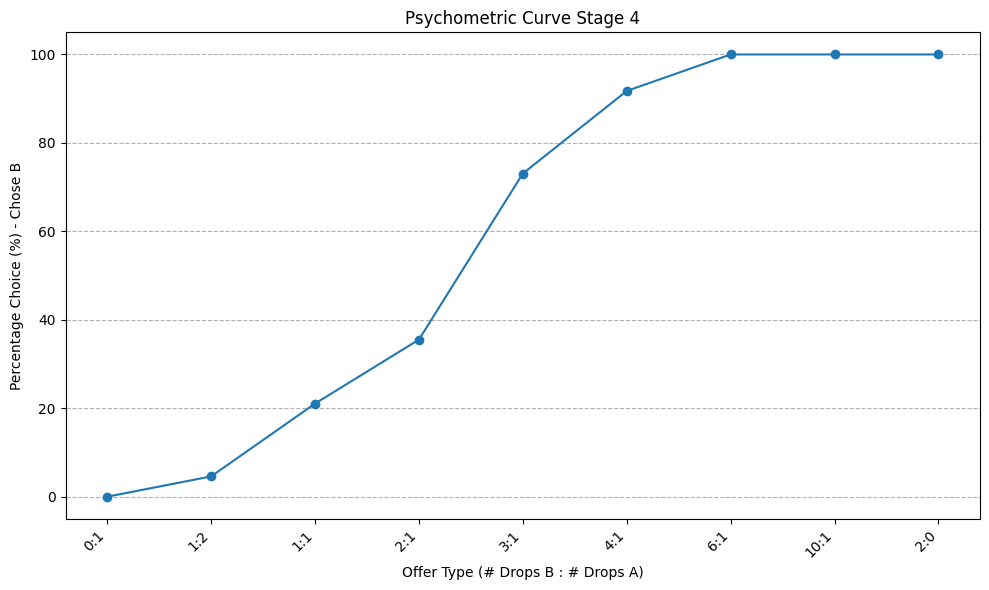

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.001,
        "reward_go_fixation": -0.01,
        "duration_params": [240, 160, 320, 320],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 3e-3,
        "critic_lr": 3e-3,
        "num_episodes": 1000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 5 finished.")

    # --- Save checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_5.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 4")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.001
  reward_go_fixation: -0.01
  duration_params: [480, 320, 640, 840]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 25
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-06-05 16:34:06.191968: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 5...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_5/ckpt-1
Checkpoint restored successfully.
Starting training for 500 episodes...
Episode 25	Total Reward: 3.09	State [ 0.         -1.          0.05477275  0.31588727]	Actor Loss: 0.0030	Critic Loss: 0.2272
Episode 50	Total Reward: 10.10	State [0.         1.         1.0691003  0.12202144]	Actor Loss: 0.0030	Critic Loss: 31.2616
Episode 75	Total Reward: 6.08	State [ 0.         -1.          0.14698443  0.6439673 ]	Actor Loss: 0.0030	Critic Loss: 7.4854
Episode 100	Total Reward: 3.10	State [0.         1.         0.3100081  0.06818713]	Actor Loss: 0.0032	Critic Loss: 0.1424
Episode 125	Total Reward: 2.30	State [ 0.         -1.          0.2201605   0.08411895]	Actor Loss: 0.0030	Critic Loss: 0.1423
Episod

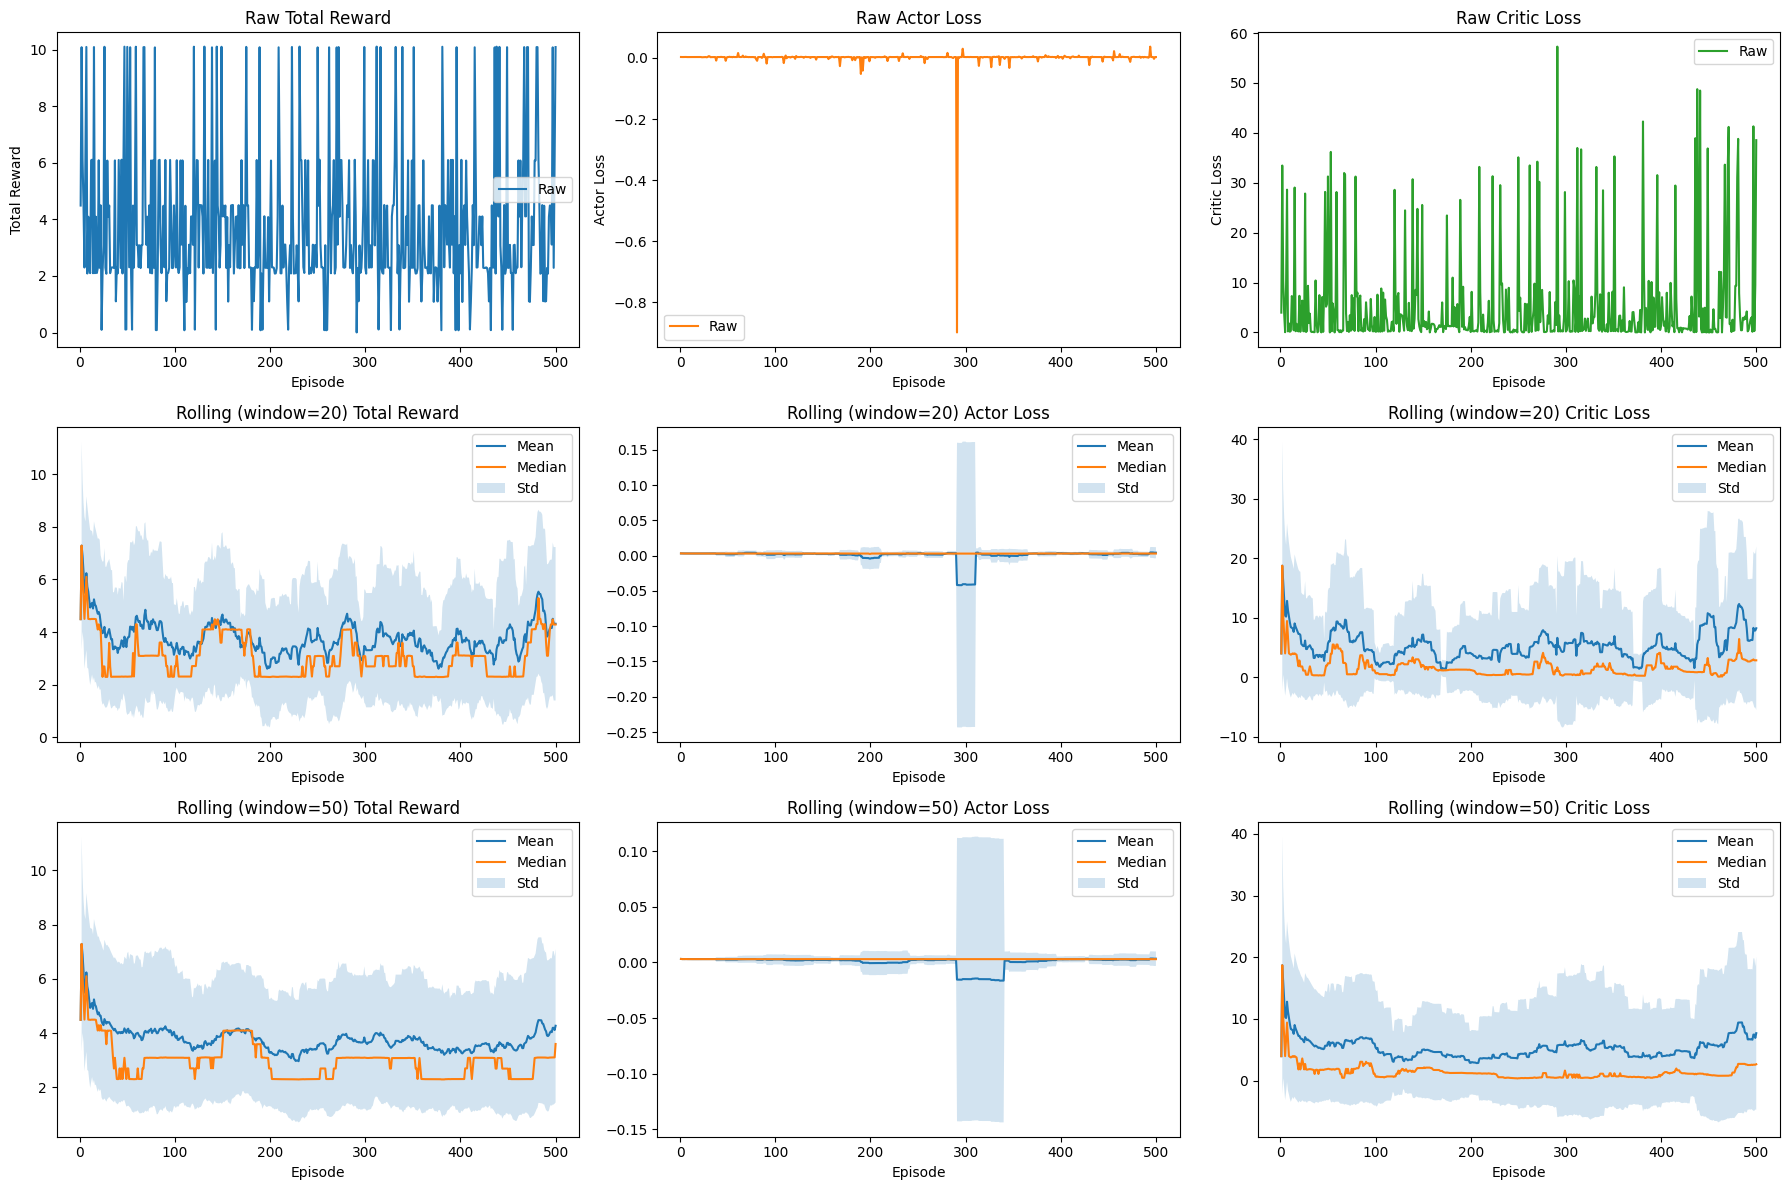

Plotting psychometric curve...


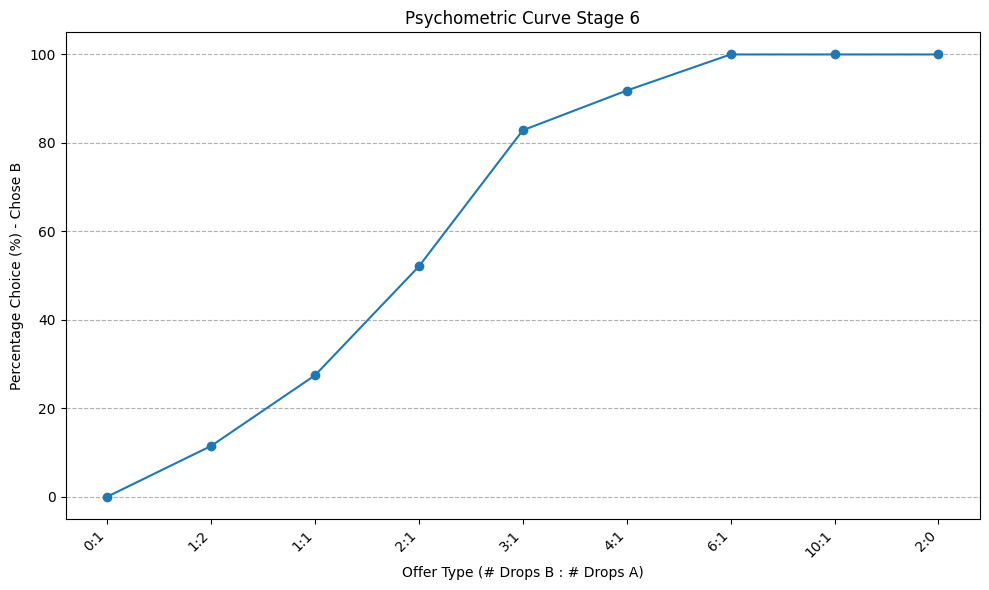

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.001,
        "reward_go_fixation": -0.01,
        "duration_params": [480, 320, 640, 840],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 25,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 6 finished.")

    # --- Save checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_6.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 6")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.001
  reward_go_fixation: -0.01
  duration_params: [960, 640, 1280, 1280]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 450
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 25
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 6...
Masks loaded.
Initializing optimizers with dummy step...


2025-06-05 18:02:50.871885: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_6/ckpt-1
Checkpoint restored successfully.
Starting training for 450 episodes...
Episode 25	Total Reward: 3.20	State [ 0.         -1.          0.03057857  0.3797454 ]	Actor Loss: 0.0030	Critic Loss: 0.2635
Episode 50	Total Reward: 10.20	State [0.         1.         0.7384077  0.08139385]	Actor Loss: 0.0030	Critic Loss: 27.7687
Episode 75	Total Reward: 6.18	State [ 0.         -1.          0.          0.45939133]	Actor Loss: 0.0030	Critic Loss: 8.3947
Episode 100	Total Reward: 2.37	State [0.         1.         0.22172251 0.13755754]	Actor Loss: 0.0023	Critic Loss: 0.3834
Episode 125	Total Reward: 1.21	State [ 0.         -1.          0.03659623  0.15281937]	Actor Loss: -0.0002	Critic Loss: 2.3423
Episode 150	Total Reward: 4.18	State [0.         1.         0.4336619  0.04687511]	Actor Loss: 0.0029	Critic Loss: 1.7239
Episode 175	Total Reward: 10.19	State [0.         1.         0.95997995 0.13056284]	Actor Loss

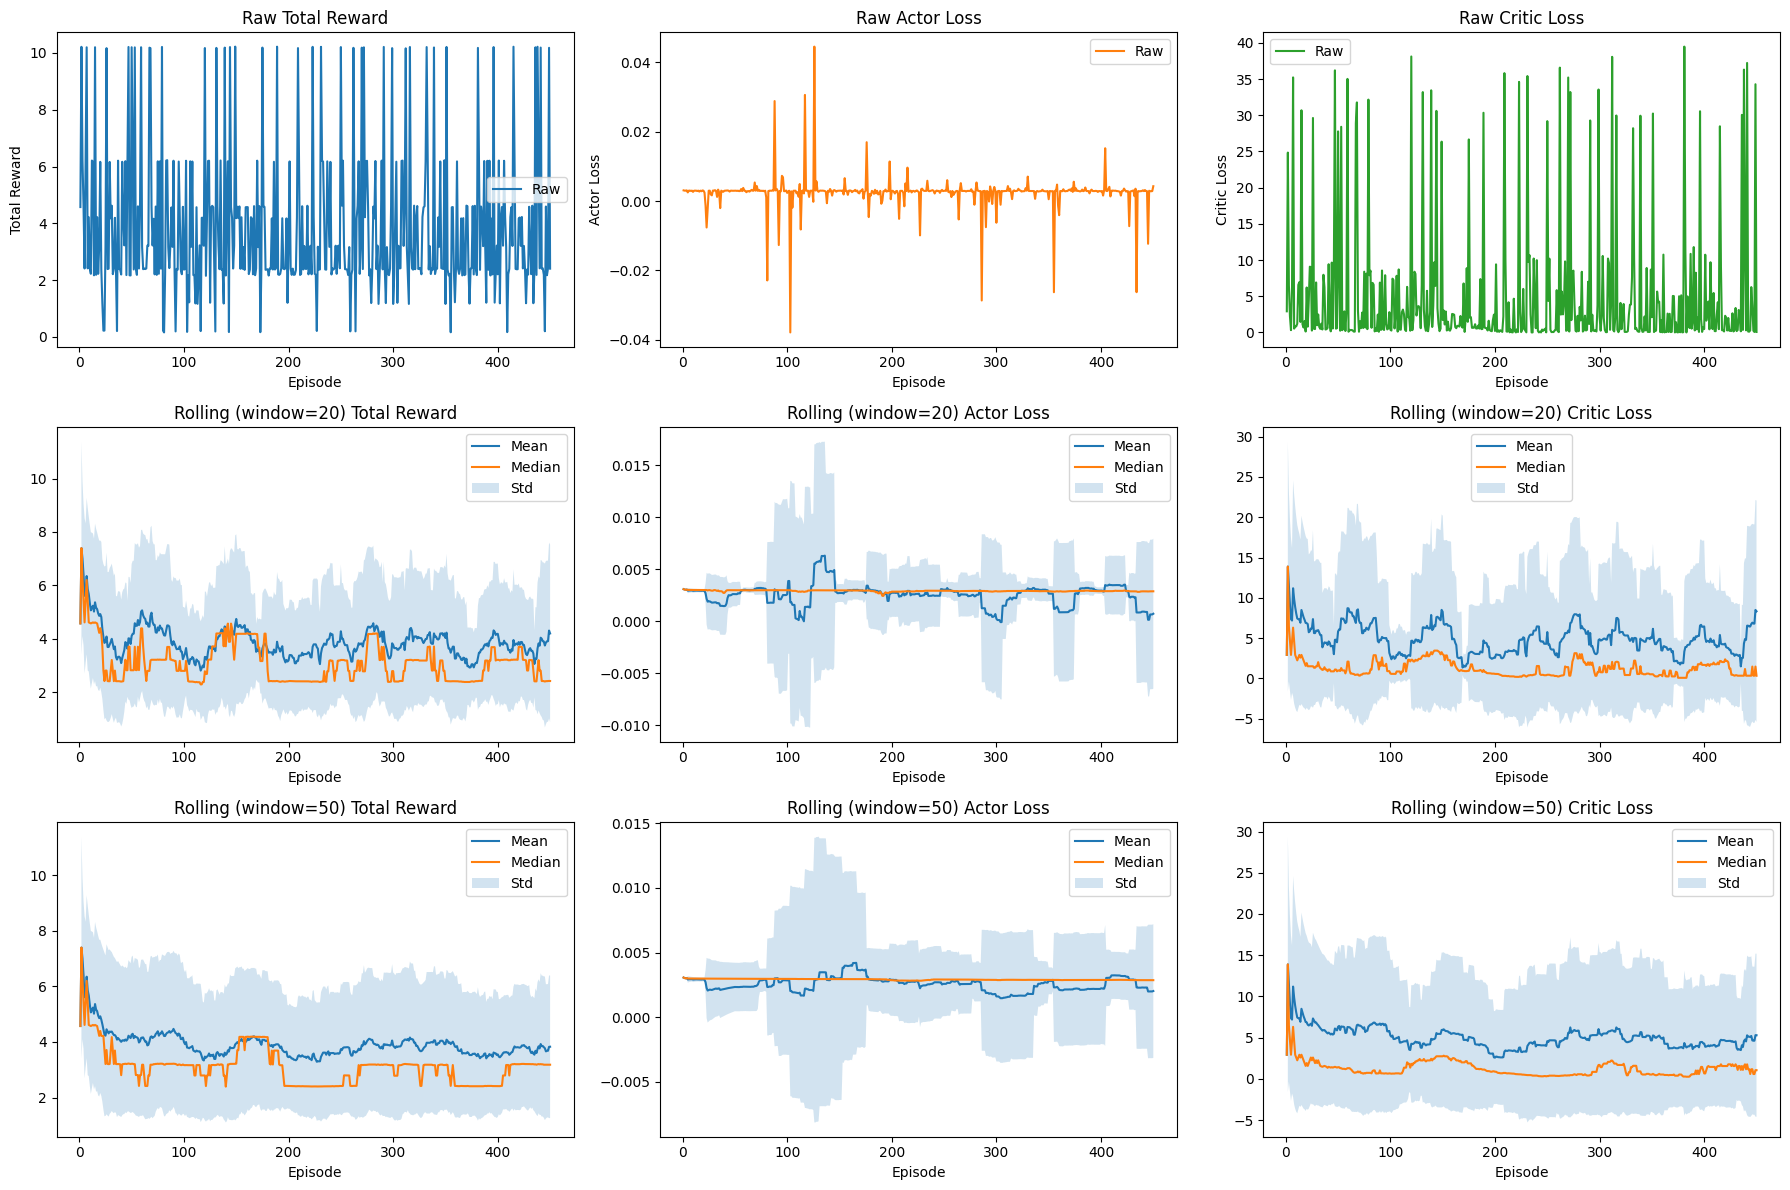

Plotting psychometric curve...


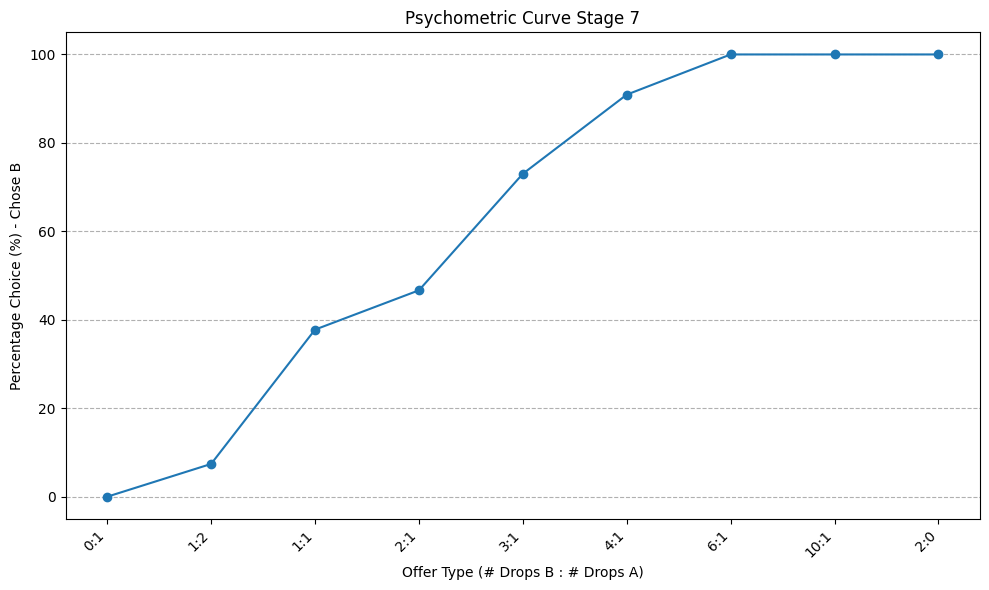

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.001,
        "reward_go_fixation": -0.01,
        "duration_params": [960, 640, 1280, 1280],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 450,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 25,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 7
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 7 finished.")

    # --- Save checkpoint ---
    this_stage = 7
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_7.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 7")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.001
  reward_go_fixation: -0.01
  duration_params: [1500, 1000, 2000, 2000]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 250
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 10
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 7...


2025-06-05 18:25:48.955645: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_7/ckpt-1
Checkpoint restored successfully.
Starting training for 250 episodes...
Episode 10	Total Reward: 2.47	State [ 0.         -1.          0.04228054  0.01067458]	Actor Loss: 0.0030	Critic Loss: 0.0841
Episode 20	Total Reward: 6.28	State [ 0.         -1.          0.16770448  0.6214115 ]	Actor Loss: 0.0029	Critic Loss: 11.0335
Episode 30	Total Reward: 4.29	State [ 0.         -1.          0.30831367  0.463455  ]	Actor Loss: 0.0050	Critic Loss: 2.7056
Episode 40	Total Reward: 0.28	State [ 0.         -1.          0.00856063  0.15637942]	Actor Loss: -0.0045	Critic Loss: 5.4848
Episode 50	Total Reward: 10.35	State [0.         1.         1.1        0.09741532]	Actor Loss: 0.0028	Critic Loss: 28.0289
Episode 60	Total Reward: 2.50	State [ 0.         -1.          0.16769356  0.31366813]	Actor Loss: 0.0034	Critic Loss: 0.1125
Episode 70	Total Reward: 2.47	S

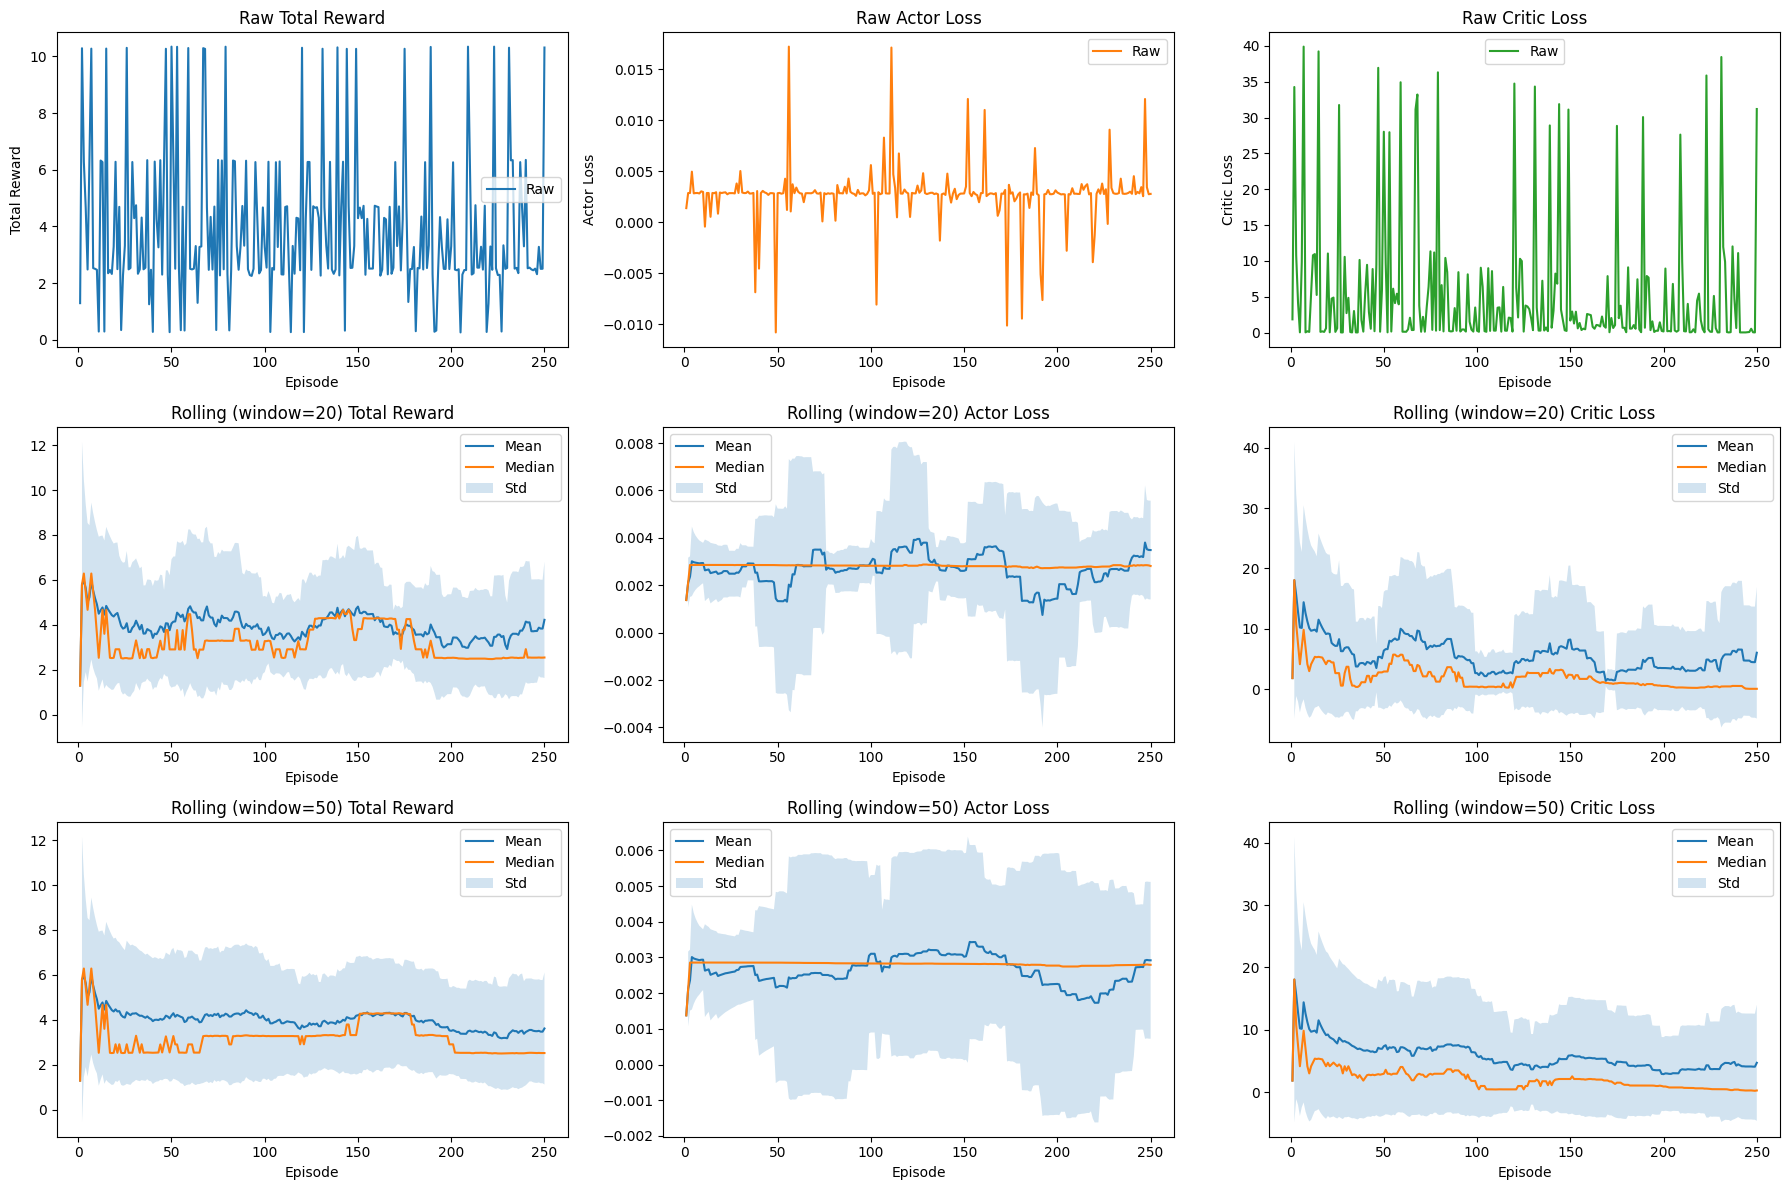

Plotting psychometric curve...


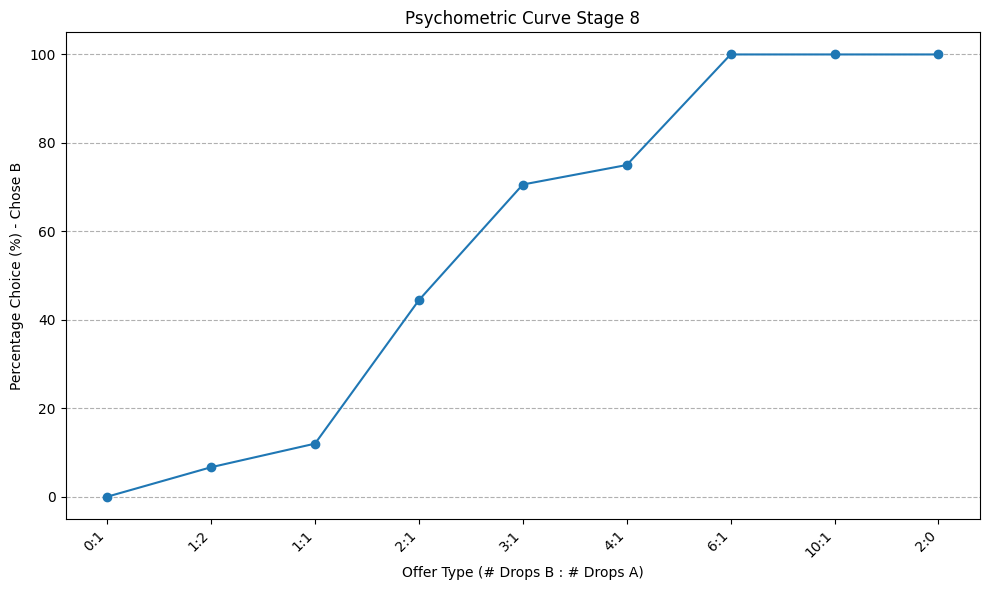

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.001,
        "reward_go_fixation": -0.01,
        "duration_params": [1500, 1000, 2000, 2000],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 250,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 10,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 8 finished.")

    # --- Save checkpoint ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_8.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 8")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  A_to_B_ratio: 2.2
  reward_B: 1
  abort_penalty: -0.1
  input_noise_sigma: 0.01
  reward_fixation: 0.001
  reward_go_fixation: -0.01
  duration_params: [1500, 1000, 2000, 2000]
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.002
  critic_lr: 0.002
  num_episodes: 250
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 10
  record_history: 1
Creating Padoa-Schioppa environment...
Observation size: 4, Action size: 3
Initializing Actor-Critic Agent...


2025-06-05 19:00:49.949670: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 8...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_nohold_max_8/ckpt-1
Checkpoint restored successfully.
Starting training for 250 episodes...
Episode 10	Total Reward: 2.53	State [ 0.         -1.          0.18123485  0.        ]	Actor Loss: 0.0023	Critic Loss: 0.1369
Episode 20	Total Reward: 6.31	State [ 0.         -1.          0.26356176  0.47636083]	Actor Loss: 0.0032	Critic Loss: 7.5117
Episode 30	Total Reward: 4.29	State [ 0.         -1.          0.17811681  0.31555358]	Actor Loss: 0.0057	Critic Loss: 1.8650
Episode 40	Total Reward: 2.32	State [ 0.         -1.          0.          0.24290788]	Actor Loss: 0.0026	Critic Loss: 0.1455
Episode 50	Total Reward: 10.26	State [0.        1.        1.0111507 0.       ]	Actor Loss: 0.0028	Critic Loss: 35.4708
Episode 

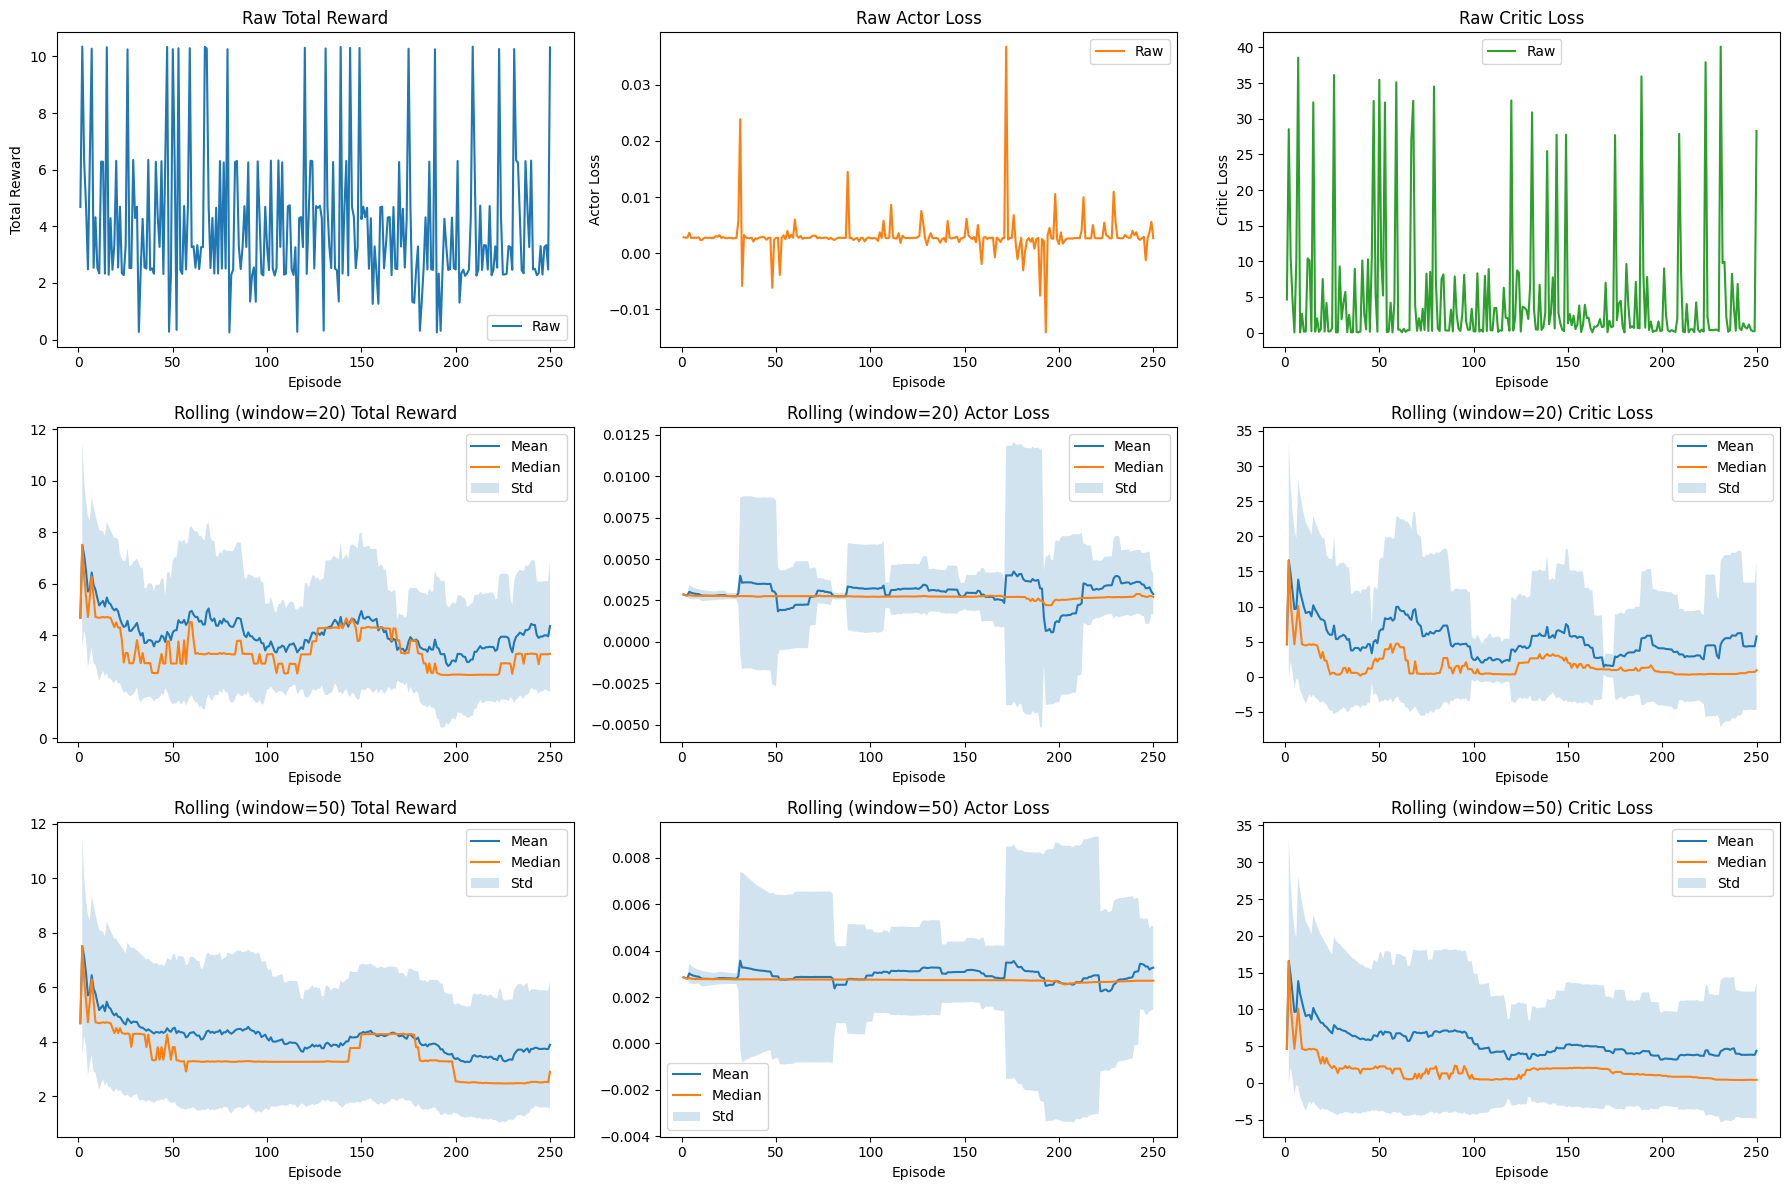

Plotting psychometric curve...


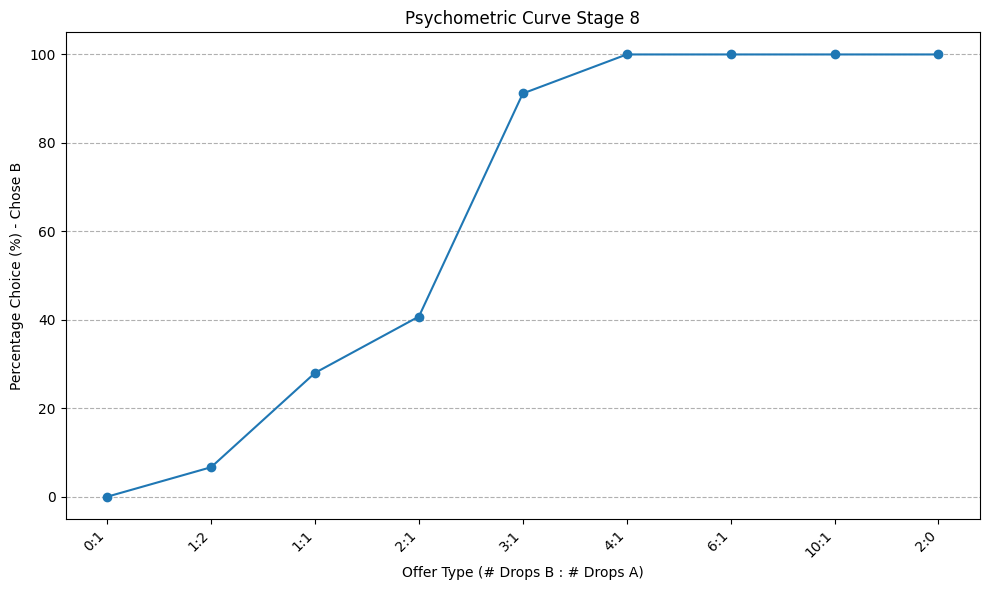

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "dt": 10,
        "A_to_B_ratio": 2.2,
        "reward_B": 1,
        "abort_penalty": -0.1,
        "input_noise_sigma": 0.01,
        "reward_fixation": 0.001,
        "reward_go_fixation": -0.01,
        "duration_params": [1500, 1000, 2000, 2000],
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": 'Dense',
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 2e-3,
        "critic_lr": 2e-3,
        "num_episodes": 250,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 10,
        "record_history": 1
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print("Creating Padoa-Schioppa environment...")
    env = EconomicChoiceEnv(
        dt=config["dt"],
        A_to_B_ratio=config["A_to_B_ratio"],
        reward_B=config["reward_B"],
        abort_penalty=config["abort_penalty"],
        input_noise_sigma=config["input_noise_sigma"],
        reward_fixation=config["reward_fixation"],
        reward_go_fixation=config["reward_go_fixation"],
        duration_params=config["duration_params"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_juices = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 9 finished.")

    # --- Save checkpoint ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/2_ffnn_nohold_max'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_nohold_max_9.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_juices
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )
    print("Plotting psychometric curve...")
    plot_psychometric_curve(measurements_juices, title="Psychometric Curve Stage 8")

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")


if __name__ == '__main__':
    main()